In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
data= pd.read_csv(r'C:\Users\91630\Desktop\Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    sns.catplot(x = x_axis, y = y_axis, data = data, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

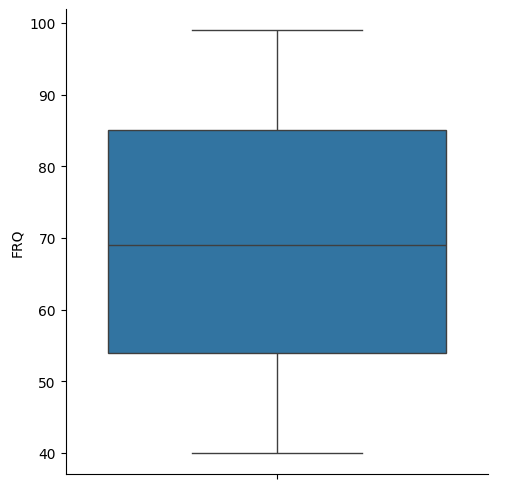

In [5]:
box_plot(y_axis = "Previous Scores")

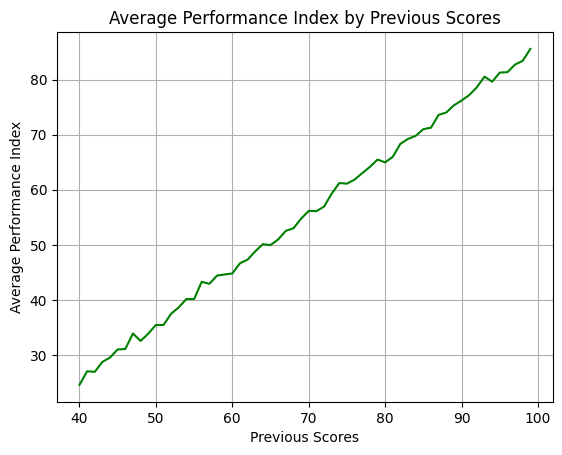

In [6]:

# Calculate average performance index by previous scores
avg_performance_by_scores = data.groupby('Previous Scores')['Performance Index'].mean()

# Plot the data
plt.plot(avg_performance_by_scores.index, avg_performance_by_scores.values, color='green')

# Add labels and title
plt.xlabel('Previous Scores')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Previous Scores')

# Show plot
plt.grid(True)
plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [8]:
encoder = LabelEncoder()

data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])

In [9]:

X = data.drop(columns = "Performance Index")
y = data["Performance Index"]

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [11]:
print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (8000, 5)
y_train shape:  (8000,)
x_test shape:  (2000, 5)
y_test shape:  (2000,)


In [12]:
from sklearn.metrics import accuracy_score
model = LinearRegression()

model.fit(X_train,y_train)
model.score(X_train, y_train)

0.9886898790682355

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv(r'C:\Users\91630\Desktop\Student_Performance.csv')

# Extract features and target variable
X = data.drop('Performance Index', axis=1)  # Features
y = data['Performance Index']  # Target variable

# Apply label encoding to binary categorical variables
label_encoder = LabelEncoder()
X['Extracurricular Activities'] = label_encoder.fit_transform(X['Extracurricular Activities'])

# Train regression models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()

# Train models
linear_reg.fit(X, y)
decision_tree_reg.fit(X, y)
random_forest_reg.fit(X, y)

# Now predict for the new student
new_student_features = {}
for feature in X.columns:
    while True:
        value = input(f"Enter value for {feature}: ")
        if value in label_encoder.classes_ or feature != 'Extracurricular Activities':
            new_student_features[feature] = value
            break
        else:
            print("Invalid input. Please enter a valid value.")

# Convert the user input into DataFrame
new_student_df = pd.DataFrame([new_student_features])

# Apply label encoding to the 'Extracurricular Activities' column
new_student_df['Extracurricular Activities'] = label_encoder.transform(new_student_df['Extracurricular Activities'])

# Predict performance index for the new student using each model
predictions_new_student = {
    "Linear Regression": linear_reg.predict(new_student_df),
    "Decision Tree Regression": decision_tree_reg.predict(new_student_df),
    "Random Forest Regression": random_forest_reg.predict(new_student_df)
}

# Find the model with the highest predicted performance index
best_model_name = max(predictions_new_student, key=predictions_new_student.get)
best_prediction = predictions_new_student[best_model_name][0]

# Print predictions of all models
print("Predictions for the new student:")
for model, prediction in predictions_new_student.items():
    print(f"{model}: {prediction[0]}")

# Print the best predicted performance index
print(f"\nPredicted performance index for the new student using the best model ({best_model_name}): {best_prediction}")


Predictions for the new student:
Linear Regression: 81.87462456290118
Decision Tree Regression: 82.0
Random Forest Regression: 81.59

Predicted performance index for the new student using the best model (Decision Tree Regression): 82.0


In [16]:
import pickle
from sklearn.svm import SVC
sv = SVC(kernel='linear').fit(X_train,y_train)
pickle.dump(sv, open('student.pkl', 'wb'))
